In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_erosion, label


In [12]:
def hit_or_miss_transform(image, B1, B2):
    eroded_fore = binary_erosion(image, structure=B1)
    eroded_back = binary_erosion(~image, structure=B2)
    return eroded_fore & eroded_back

def place_L(img, top, left):
    L_pattern = np.array([[1, 0, 0],
                          [1, 0, 0],
                          [1, 1, 1]], dtype=bool)
    img[top:top+L_pattern.shape[0], left:left+L_pattern.shape[1]] = L_pattern
    return img


In [ ]:
image = np.random.rand(100, 100) < 0.1

image = place_L(image, 10, 10)
image = place_L(image, 50, 50)
image = place_L(image, 70, 20)
image = place_L(image, 10, 70)
image = place_L(image, 50, 68)
image = place_L(image, 70, 79)


In [ ]:
B1 = np.array([[1, 0, 0],
               [1, 0, 0],
               [1, 1, 1]], dtype=bool)

B2 = np.array([[0, 1, 1],
               [0, 1, 1],
               [0, 0, 0]], dtype=bool)


In [15]:
result = hit_or_miss_transform(image, B1, B2)

In [16]:
labeled, num_features = label(result)
print("Número de 'L' detectadas:", num_features)

Número de 'L' detectadas: 6


<Figure size 1800x600 with 0 Axes>

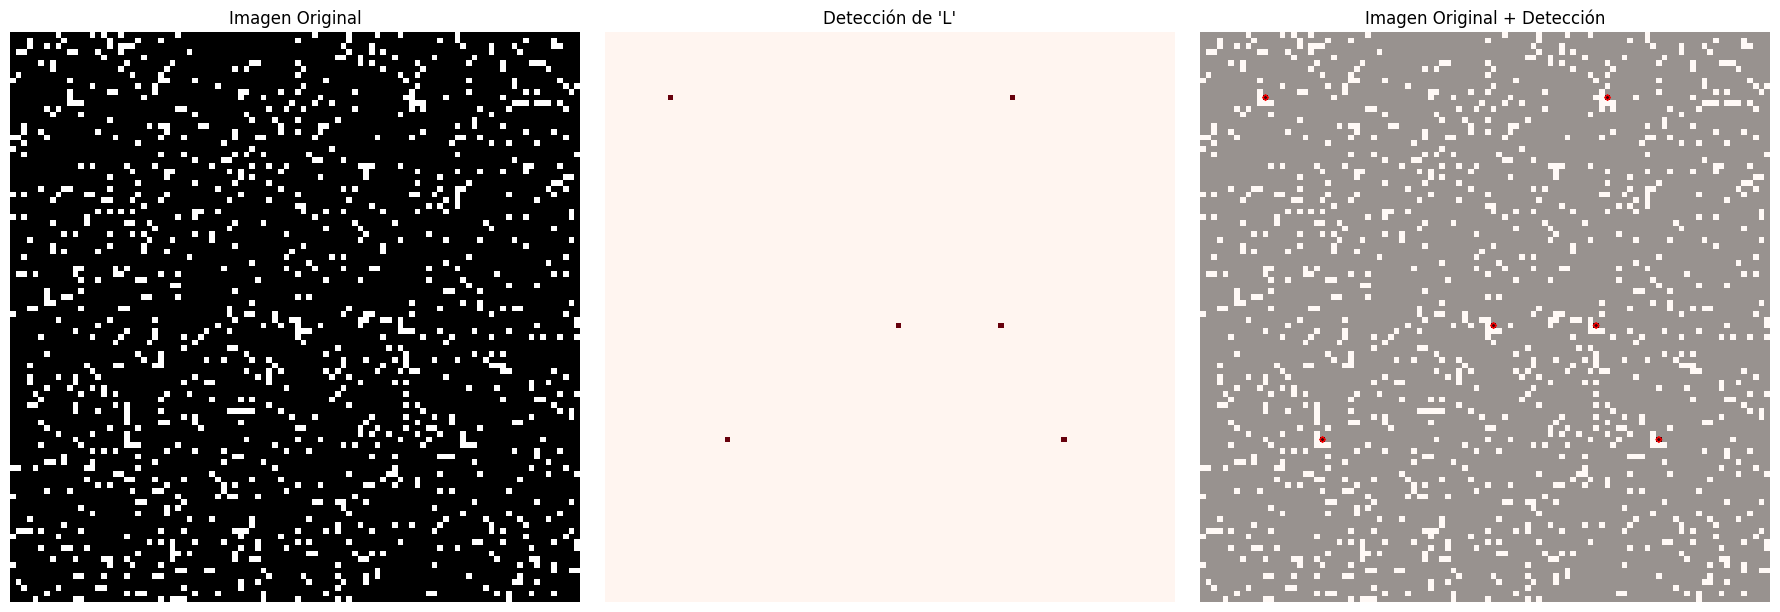

In [ ]:
plt.figure(figsize=(18,6))
fig, axes = plt.subplots(1, 3, figsize=(18,6))

axes[0].imshow(image, cmap='gray')
axes[0].set_title("Imagen Original")
axes[0].axis('off')

axes[1].imshow(result, cmap='Reds')
axes[1].set_title("Detección de 'L'")
axes[1].axis('off')

axes[2].imshow(image, cmap='gray')
axes[2].imshow(result, cmap='Reds', alpha=0.6)
axes[2].contour(result, colors='red', linewidths=1)
axes[2].set_title("Imagen Original + Detección")
axes[2].axis('off')

plt.tight_layout()
plt.show()
